In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:, 1:]
Y = data[:, 0]
print(X.shape, Y.shape)

(42000, 784) (42000,)


In [7]:
split = int(0.8*X.shape[0])

X_train = X[:split, :]
Y_train = Y[:split]
X_test = X[split:, :]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


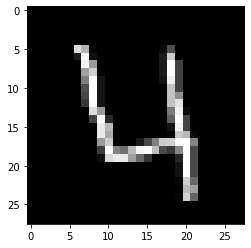

In [8]:
def drawImg(sample):
    img = sample.reshape((28, 28))
    plt.imshow(img, cmap= 'gray')
    plt.show()

drawImg(X_train[3])

In [9]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y, querpoint, k=4):
    vals = []
    m = X.shape[0]

    for i in range(m):
        d = dist(querpoint, X[i])
        vals.append((d, Y[i]))

    vals = sorted(vals)
    vals = vals[:k]

    vals = np.array(vals)
    #print(vals)

    new_vals = np.unique(vals[:, 1], return_counts=True)
    print(new_vals)

    index = new_vals[1].argmax()
    pred = new_vals[0][index]

    return pred

(array([0.]), array([4], dtype=int64))
0


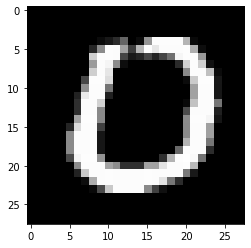

0


In [10]:
pred = knn(X_train, Y_train, X_test[0])
print(int(pred))
drawImg(X_test[0])
print(Y_test[0])